<a href="https://colab.research.google.com/github/vfrantc/trans_experiments/blob/main/play_with_star_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/vfrantc/fft-conv-pytorch/master/fft_conv.py

--2022-06-15 09:20:26--  https://raw.githubusercontent.com/vfrantc/fft-conv-pytorch/master/fft_conv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6936 (6.8K) [text/plain]
Saving to: ‘fft_conv.py’

fft_conv.py         100%[===================>]   6.77K  --.-KB/s    in 0s      

2022-06-15 09:20:26 (54.7 MB/s) - ‘fft_conv.py’ saved [6936/6936]



In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
!cp /content/drive/MyDrive/deweather/input.zip .

In [ ]:
import cv2
import numpy as np
from skimage import io
from skimage.color import rgb2hsv
from scipy.signal import convolve
from scipy.sparse import spdiags
import matplotlib.pyplot as plt
import torch

Mounted at drive


In [ ]:
def norm(a):
  return np.sqrt(np.sum(a**2))

In [ ]:
def convbox(I, r):
    f = np.ones((1, 2*r+1))
    f = f / sum(f.ravel())
    J = np.pad(I, [(r, r), (r, r)], 'edge')
    J = scipy.signal.convolve(J, f, mode='valid', method='auto')
    J = scipy.signal.convolve(J, f.T, mode='valid', method='auto')
    return J

In [ ]:
def solveLinearSystem(s, ir, uvx, uvy, alphabet, b=0, lmbd=0, method='pcg'):
    h, w = s.shape[:2]
    hw = h * w

    # calculate the five-point positive definite Laplacian matrix
    uvx = uvx.ravel()
    uvy = uvy.ravel()
    
    # check how this padarray does work in matlab
    ux = np.padarray(uvx, h, 'pre')
    ux = ux[:-h]
    uy = np.padarray(uvy, 1, 'pre')
    uy = uy[:-1]
    D = uvx + ux + uvy + uy
    # what is spdiags in the matlab
    T = np.spdiags([-uvx, -uvy],[-h,-1],hw,hw)
    # calculate the variable of linear system
    MN = T + T.T + spdiags(D, 0, hw, hw);               # M in Eq.(12) or N in Eq.(13)    
    ir2 = ir**2                                         # R^{T}R in Eq.(12) or I^{T}I in Eq.(13)
    ir2 = np.spdiags(ir2(:),0,hw,hw)
    DEN = ir2 + alphabet * MN + lmbd * np.speye(hw, hw) # denominator in Eq.(12) or Eq.(13)
    NUM = ir.*s + lmbd * b                              # numerator in Eq.(12) or Eq.(13) 
    L = ichol(DEN,struct('michol','on'))
    [dst,~] = pcg(DEN, NUM(:), 0.01, 40, L, L.T) 
    dst = np.reshape(dst, (h, w))
    return dst

SyntaxError: invalid syntax (1815442573.py, line 20)

In [ ]:
alpha=0.001
beta=0.0001
pI=1.5
pR=0.5
varreps = 0.01
r = 3
K=20
debug=True
eps = 0.000001

In [ ]:
src = cv2.imread('001.png', 1)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
src = src.astype(np.float64) / 256
src = rgb2hsv(src)
src = src[:, :, 2]
S = src

In [ ]:
I=S           
R=np.ones_like(S)

In [ ]:
print(I.shape, R.shape)

(456, 640) (456, 640)


In [ ]:
preI = I
preR = R

In [ ]:
I = S / R

(456, 640)


([], [])

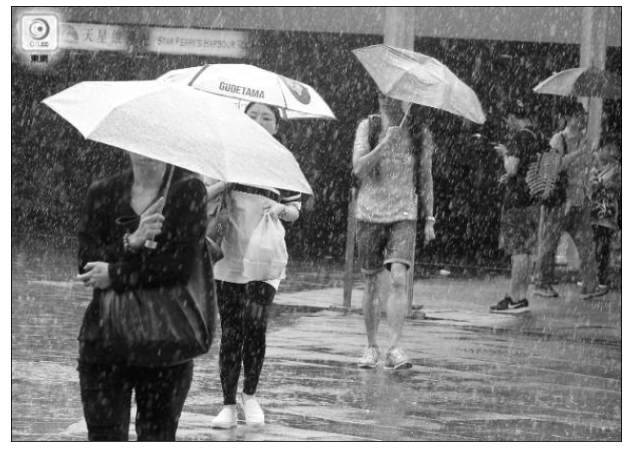

In [ ]:
print(I.shape)
plt.figure(figsize=(16, 8))
plt.imshow(I, cmap='gray')
plt.xticks([])
plt.yticks([])


In [ ]:
Ix = np.diff(I, n=1, axis=1)
Ix = np.pad(Ix, [(0, 0), (0, 1)], 'edge')
Iy = np.diff(I, n=1, axis=0);                
Iy = np.pad(Iy, [(0, 1), (0, 0)], 'edge');

(456, 640)


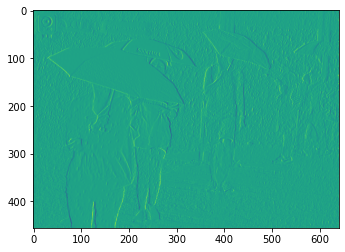

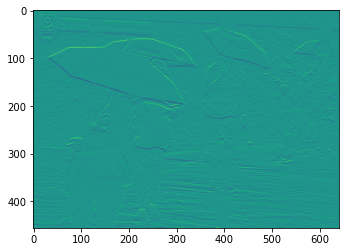

In [ ]:
print(Ix.shape)
plt.figure()
plt.imshow(Ix)
plt.show()

plt.figure()
plt.imshow(Iy)
plt.show()

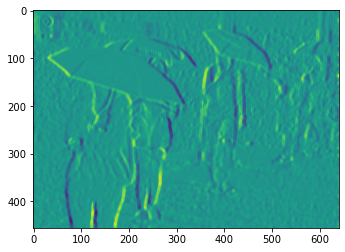

In [ ]:
avgIx=convbox(Ix, r)
plt.figure()
plt.imshow(avgIx)
plt.show()

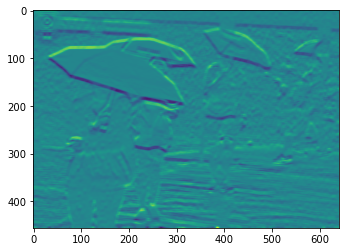

In [ ]:
avgIy=convbox(Iy, r)
plt.figure()
plt.imshow(avgIy)
plt.show()

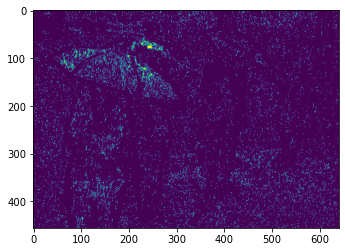

In [ ]:
ux = np.maximum(np.abs(avgIx)**pI,eps)**(-1)
plt.figure()
plt.imshow(ux)
plt.show()

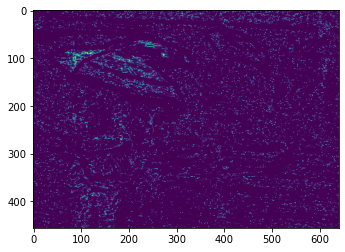

In [ ]:
uy = np.maximum(np.abs(avgIy)**pI,eps)**(-1)
plt.figure()
plt.imshow(uy)
plt.show()

In [ ]:
ux[:,-1] = 0

In [ ]:
uy[-1,:] = 0

In [ ]:
s = S
ir = R
uvx = ux
uvy = uy

In [ ]:
h, w = s.shape[:2]
hw = h * w

In [ ]:
uvx = uvx.ravel()
uvy = uvy.ravel()
ux = np.pad()

In [ ]:

    # calculate the five-point positive definite Laplacian matrix

    
    # check how this padarray does work in matlab
    ux = np.padarray(uvx, h, 'pre')
    ux = ux[:-h]
    uy = np.padarray(uvy, 1, 'pre')
    uy = uy[:-1]
    D = uvx + ux + uvy + uy
    # what is spdiags in the matlab
    T = np.spdiags([-uvx, -uvy],[-h,-1],hw,hw)
    # calculate the variable of linear system
    MN = T + T.T + spdiags(D, 0, hw, hw);               # M in Eq.(12) or N in Eq.(13)    
    ir2 = ir**2                                         # R^{T}R in Eq.(12) or I^{T}I in Eq.(13)
    ir2 = np.spdiags(ir2(:),0,hw,hw)
    DEN = ir2 + alphabet * MN + lmbd * np.speye(hw, hw) # denominator in Eq.(12) or Eq.(13)
    NUM = ir.*s + lmbd * b                              # numerator in Eq.(12) or Eq.(13) 
    L = ichol(DEN,struct('michol','on'))
    [dst,~] = pcg(DEN, NUM(:), 0.01, 40, L, L.T) 
    dst = np.reshape(dst, (h, w))

In [ ]:
I = solveLinearSystem(S, R, ux, uy, alpha)

NameError: name 'solveLinearSystem' is not defined

In [ ]:
eplisonI = np.linalg.norm(I-preI, 'fro')/npnorm(preI, 'fro');

In [ ]:
% it seems to be unnecessary, it gets reinitialized immediately
I=S;             % initialize I_0 % initialize the iterations, initialize Illumination with the value = S
R=ones(size(S)); % initialize R_0 % R -> reflection, start with all the ones
% 
if debug == true
    fprintf('-- Stop iteration until eplison < %02f or K > %d\n', vareps, K);
end
for iter = 1:K % for maximum of 20 values
    preI=I; % take the previous value of the illumination
    preR=R; % reflection map -> the best one
    
    %% algorithm for P1
    %pI=max(pI,pR);, estimation for the P1 - it's not clear what it is
    I=S./R;                             % I=S./R take the current I as the source image devided by estimated reflection. In python simple devision
    Ix = diff(I,1,2);                   % Estimate diff on the x-axis
    Ix = padarray(Ix, [0 1], 'post');   % Post ->
    Iy = diff(I,1,1);                   % 
    Iy = padarray(Iy, [1 0], 'post');   % 
    avgIx=convBox( single(Ix), r);      % so convbox should be a specific thing?? r - is 
    avgIy=convBox( single(Iy), r);
    ux = max(abs(avgIx).^pI,eps).^(-1);  % structure map avgIx.^pI > avgIx.*Ix > Ix.^2
    uy = max(abs(avgIy).^pI,eps).^(-1);  % structure map
    ux(:,end) = 0;
    uy(end,:) = 0;
    
    I = solveLinearSystem(S, R, ux, uy, alpha);  % Eq.(12)
    eplisonI = norm(I-preI, 'fro')/norm(preI, 'fro');   % iterative error of I
    
    %% algorithm for P2
    %pR=min(pI,pR);
    R=S./I;
    Rx = diff(R,1,2); Rx = padarray(Rx, [0 1], 'post');
    Ry = diff(R,1,1); Ry = padarray(Ry, [1 0], 'post');
    avgRx=convBox( single(Rx), r);
    avgRy=convBox( single(Ry), r);
    vx = max(abs(avgRx).^pR,eps).^(-1);  % texture map
    vy = max(abs(avgRy).^pR,eps).^(-1);  % texture map
    vx(:,end) = 0;
    vy(end,:) = 0;
    
    R = solveLinearSystem(S, I, vx, vy, beta);            	% Eq.(13)
    eplisonR = norm(R-preR, 'fro')/norm(preR, 'fro');   % iterative error of R
    
6
    if(eplisonI<vareps||eplisonR<vareps)
        break;
    end
end
I(I<0)=0;
R(R<0)=0;
end

# Implement the same thing on the GPU

# Examen my IDE implementation

In [4]:
import cv2
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import scipy.ndimage.filters as nd_filters
import matplotlib.pyplot as plt
from fft_conv import fft_conv, FFTConv2d

In [6]:
!unzip input.zip

Archive:  input.zip
   creating: input/
  inflating: input/get_list.py.ipynb  
  inflating: input/.DS_Store         
  inflating: __MACOSX/input/._.DS_Store  
  inflating: input/natural.txt       
   creating: input/input/
   creating: input/.ipynb_checkpoints/
  inflating: input/input/348.png     
  inflating: input/input/412.png     
  inflating: input/input/374.png     
  inflating: input/input/360.png     
  inflating: input/input/406.png     
  inflating: input/input/638.png     
  inflating: input/input/176.png     
  inflating: input/input/610.png     
  inflating: input/input/604.png     
  inflating: input/input/162.png     
  inflating: input/input/002.png     
  inflating: input/input/016.png     
  inflating: input/input/228.png     
  inflating: input/input/566.png     
  inflating: input/input/200.png     
  inflating: input/input/214.png     
  inflating: input/input/572.png     
  inflating: input/input/599.png     
  inflating: input/input/215.png     
  inflating: inp

In [7]:
def local_filter(x, order):
  x.sort()
  return x[order]

In [8]:
def ordfilt2(A, order, mark_size):
    return nd_filters.generic_filter(A, lambda x, ord=order: local_filter(x, ord), size=(mark_size, mark_size))

In [12]:
def recovery(image, A_):
  graymean = 0.5
  size = 75
  p1 = -0.397
  p2 = 0.07774 
  A_ = np.mean(A)

  image = nn.ReflectionPad2d((size//2, size//2, size//2, size//2))(image)
  mean_image = (image[:, 0, :, :] + image[:, 1, :, :] + image[:, 2, :, :]).unsqueeze(0) / 3
  kernel = torch.ones((1, 1, size, size)) / (size*size)
  local_mean_image = fft_conv(mean_image, kernel, padding=size//2)

  #t_low = 0.382618
  t_low = 0.55
  a = np.log(t_low) * A_
  b = np.log(t_low) * local_mean_image - A_ * graymean * p1 + np.log(t_low) * A_ * p2 - np.log(t_low) * A_
  c = p2 * np.log(t_low) * local_mean_image - np.log(t_low) * A_ * p2
  t = torch.abs((-b - torch.sqrt(b**2 - 4*a*c)) / (2 * a))

  ILCC = (p1 / (t + p2)) / (p1 / (t_low + p2))

  red   = (image[:, 0, :, :] - A[0]*(1 - t)) / (t * A[0] * ILCC)
  green = (image[:, 1, :, :] - A[1]*(1 - t)) / (t * A[1] * ILCC)
  blue  = (image[:, 2, :, :] - A[2]*(1 - t)) / (t * A[2] * ILCC)

  out = torch.cat([red, green, blue], dim=0)
  out = out[:, :, (size//2):-(size//2), (size//2):-(size//2)]
  return out

In [13]:
def airlight(image):
  size = 10
  stride = 1
  patches = image.unfold(2, size, stride).unfold(3, size, stride)
  batch_size, channels, h, w = patches.shape[:4] 
  patches = patches.reshape(batch_size, channels, h, w, size*size)
  patches, _ = torch.sort(patches, -1, descending=False)

  max_rows, _ = patches.max(-1)
  max_cols, _ = max_rows.max(-1)
  return max_cols.numpy().ravel()

In [16]:
image = cv2.imread('input/input/386.png', 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype(np.float64) / 256
image = image.transpose((2, 0, 1))
image = torch.from_numpy(image).unsqueeze(0)
#A = airlight(image)
A = np.array([0.85546875, 0.8671875, 0.8671875], dtype=np.float64)
result = recovery(image, A)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


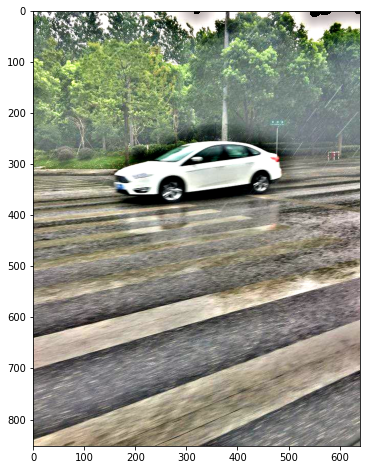

In [17]:
plt.figure(figsize=(16, 8))
plt.imshow(result.squeeze().numpy().transpose((1, 2, 0)))

# Extract the code of the guidedFilter

> Bloc con sangría



In [18]:
from numpy.core.fromnumeric import mean
class GuidedFilter(nn.Module):
  def __init__(self, r=40, eps=1e-3, gpu_ids=None):
    super(GuidedFilter, self).__init__()
    self.r = r
    self.eps = eps
    self.boxfilter = nn.AvgPool2d(kernel_size=2*self.r+1, stride=1,padding=self.r)

  def forward(self, I, p):
    N = self.boxfilter(torch.ones(p.size()))

    if I.is_cuda:
      N = N.cuda()

    mean_I = self.boxfilter(I) / N
    mean_p = self.boxfilter(p) / N
    mean_Ip = self.boxfilter(I*p) / N
    cov_Ip = mean_Ip - mean_I * mean_p

    mean_II = self.boxfilter(I*I) / N
    var_I = mean_II - mean_I * mean_I 

    a = cov_Ip / (var_I + self.eps)
    b = mean_p - a * mean_I 
    mean_a = self.boxfilter(a) / N 
    mean_b = self.boxfilter(b) / N
    return mean_a * I + mean_b

In [19]:
image = cv2.imread('input/input/386.png', 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype(np.float64) / 256
image = image.transpose((2, 0, 1))
image = torch.from_numpy(image).unsqueeze(0)
flt = GuidedFilter()
result = flt(image, image)
plt.figure(figsize=(16, 8))
plt.imshow(result.squeeze().numpy().transpose((1, 2, 0)))

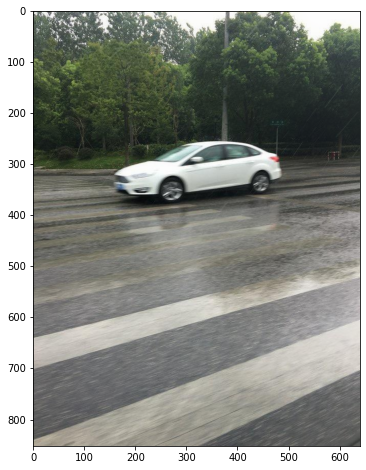

In [22]:
flt = GuidedFilter()
result = flt(image, image)
plt.figure(figsize=(16, 8))
plt.imshow(result.squeeze().numpy().transpose((1, 2, 0)))

# Extract the code of DCP

In [23]:
class DCPDehazeGenerator(nn.Module):
  def __init__(self, win_size=5, r=15, eps=1e-3):
    super(DCPDehazeGenerator, self).__init__()
    self.guided_filter = GuidedFilter(r=r, eps=eps)
    self.neighborhood_size = win_size
    self.omega = 0.95

  def get_dark_channel(self, img, neighborhood_size):
      shape = img.shape
      if len(shape) == 4:
          img_min,_ = torch.min(img, dim=1)

          padSize = np.int(np.floor(neighborhood_size/2))
          if neighborhood_size % 2 == 0:
              pads = [padSize, padSize-1 ,padSize ,padSize-1]
          else:
              pads = [padSize, padSize ,padSize ,padSize]

          img_min = F.pad(img_min, pads, mode='constant', value=1)
          dark_img = -F.max_pool2d(-img_min, kernel_size=neighborhood_size, stride=1)
      else:
          raise NotImplementedError('get_tensor_dark_channel is only for 4-d tensor [N*C*H*W]')

      dark_img = torch.unsqueeze(dark_img, dim=1)
      return dark_img

  def atmospheric_light(self, img, dark_img):
    num, chl, height, width = img.shape
    topNum = np.int(0.01*height*width)

    A = torch.Tensor(num, chl, 1, 1)
    if img.is_cuda:
      A = A.cuda()

    for num_id in range(num):
      curImg = img[num_id, ...]
      curDarkImg = dark_img[num_id, 0, ...]
      _, indices = curDarkImg.reshape([height*width]).sort(descending=True)
      for chl_id in range(chl):
          imgSlice = curImg[chl_id,...].reshape([height*width])
          A[num_id,chl_id,0,0] = torch.mean(imgSlice[indices[0:topNum]])
    return A

  def forward(self, x):
      if x.shape[1] > 1:
          # rgb2gray
          guidance = 0.2989 * x[:,0,:,:] + 0.5870 * x[:,1,:,:] + 0.1140 * x[:,2,:,:]
      else:
          guidance = x
      # rescale to [0,1]
      guidance = (guidance + 1)/2
      guidance = torch.unsqueeze(guidance, dim=1)
      imgPatch = (x + 1)/2

      num,chl,height,width = imgPatch.shape

      # dark_img and A with the range of [0,1]
      dark_img = self.get_dark_channel(imgPatch, self.neighborhood_size)
      A = self.atmospheric_light(imgPatch, dark_img)

      map_A = A.repeat(1,1,height,width)
      # make sure channel of trans_raw == 1
      trans_raw = 1 - self.omega*self.get_dark_channel(imgPatch/map_A, self.neighborhood_size)

      # get initial results
      T_DCP = self.guided_filter(guidance, trans_raw)
      J_DCP = (imgPatch - map_A)/T_DCP.repeat(1,3,1,1) + map_A

      return J_DCP, T_DCP, torch.squeeze(A)


In [26]:
def disp_me(image):
  plt.figure(figsize=(16, 8))
  plt.imshow(image.squeeze().numpy().transpose((1, 2, 0)))
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional inf

J_DCP


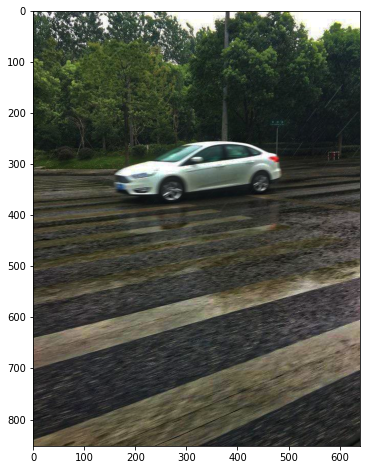

In [28]:
image = cv2.imread('input/input/386.png', 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype(np.float64) / 256
image = image.transpose((2, 0, 1))
image = torch.from_numpy(image).unsqueeze(0)

flt = DCPDehazeGenerator()
J_DCP, T_DCP, A = flt(image)

print('J_DCP')
disp_me(J_DCP)

In [30]:
T_DCP.shape

torch.Size([1, 1, 852, 640])

# Sparse data handling 


In [31]:
S = torch.sparse_coo_tensor(indices = torch.tensor([[0,0,1,2],[2,3,0,3]]), 
                            values = torch.tensor([1,2,1,3]), size=[3,4])

In [32]:
print(S)

tensor(indices=tensor([[0, 0, 1, 2],
                       [2, 3, 0, 3]]),
       values=tensor([1, 2, 1, 3]),
       size=(3, 4), nnz=4, layout=torch.sparse_coo)


In [33]:
print(S.to_dense())

tensor([[0, 0, 1, 2],
        [1, 0, 0, 0],
        [0, 0, 0, 3]])


In [34]:
D = torch.ones(3, 4, dtype=torch.int64)
torch.sparse.mm(S, D)

RuntimeError: ignored

In [36]:
!pip install kornia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 512 kB 4.4 MB/s 


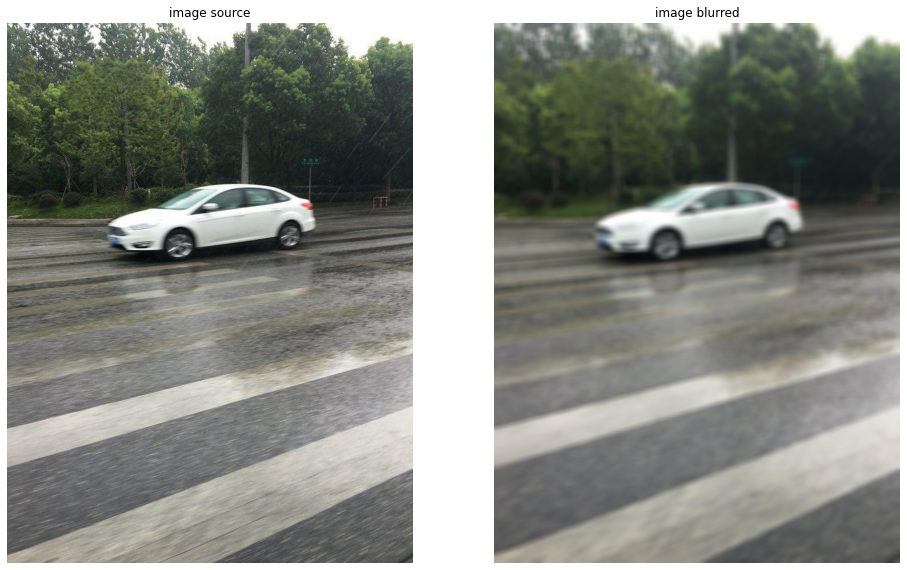

In [37]:
import torch
import kornia
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read the image with OpenCV
img: np.ndarray = cv2.imread('input/input/386.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to torch tensor
data: torch.tensor = kornia.image_to_tensor(img, keepdim=False)  # BxCxHxW


# create the operator
gauss = kornia.filters.GaussianBlur2d((11, 11), (10.5, 10.5))

# blur the image
x_blur: torch.tensor = gauss(data.float())

# convert back to numpy
img_blur: np.ndarray = kornia.tensor_to_image(x_blur.byte())

# Create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('image blurred')
axs[1].imshow(img_blur)

In [44]:
import torch
import kornia
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [45]:
img = cv2.imread('input/input/001.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0
img = img + np.random.normal(loc=0.0, scale=0.1, size=img.shape)
img = np.clip(img, 0.0, 1.0)

In [46]:
noisy_image = kornia.image_to_tensor(img).squeeze()

In [47]:
# define the total variation denoising network
class TVDenoise(torch.nn.Module):
    def __init__(self, noisy_image):
        super(TVDenoise, self).__init__()
        self.l2_term = torch.nn.MSELoss(reduction='mean')
        self.regularization_term = kornia.losses.TotalVariation()
        # create the variable which will be optimized to produce the noise free image
        self.clean_image = torch.nn.Parameter(data=noisy_image.clone(), requires_grad=True)
        self.noisy_image = noisy_image

    def forward(self):
        return self.l2_term(self.clean_image, self.noisy_image) + 0.0001 * self.regularization_term(self.clean_image)

    def get_clean_image(self):
        return self.clean_image

tv_denoiser = TVDenoise(noisy_image)

# define the optimizer to optimize the 1 parameter of tv_denoiser
optimizer = torch.optim.SGD(tv_denoiser.parameters(), lr=0.1, momentum=0.9)

# run the optimization loop
num_iters = 500
for i in range(num_iters):
    optimizer.zero_grad()
    loss = tv_denoiser()
    if i % 25 == 0:
        print("Loss in iteration {} of {}: {:.3f}".format(i, num_iters, loss.item()))
    loss.backward()
    optimizer.step()

Loss in iteration 0 of 500: 19.189
Loss in iteration 25 of 500: 18.225
Loss in iteration 50 of 500: 16.883
Loss in iteration 75 of 500: 15.595
Loss in iteration 100 of 500: 14.389
Loss in iteration 125 of 500: 13.263
Loss in iteration 150 of 500: 12.215
Loss in iteration 175 of 500: 11.241
Loss in iteration 200 of 500: 10.338
Loss in iteration 225 of 500: 9.503
Loss in iteration 250 of 500: 8.733
Loss in iteration 275 of 500: 8.024
Loss in iteration 300 of 500: 7.374
Loss in iteration 325 of 500: 6.780
Loss in iteration 350 of 500: 6.238
Loss in iteration 375 of 500: 5.747
Loss in iteration 400 of 500: 5.302
Loss in iteration 425 of 500: 4.900
Loss in iteration 450 of 500: 4.538
Loss in iteration 475 of 500: 4.213


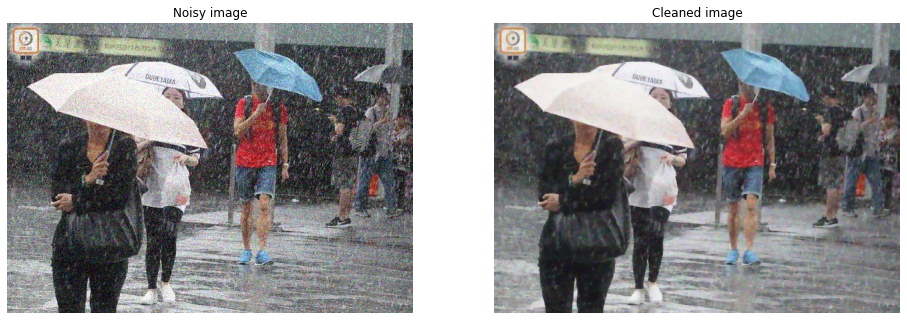

In [48]:
# convert back to numpy
img_clean: np.ndarray = kornia.tensor_to_image(tv_denoiser.get_clean_image())

# Create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(img_clean)

plt.show()

# Make a quaternion version 